In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Part 1: Preparing the Data

In [2]:
file_path = Path("./Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Finding out if there are any missing/null values
df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [4]:
# Finding out if there are any duplicated rows
df.duplicated().sum()

0

In [5]:
# Statistical summary
df.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [7]:
labels = df["MYOPIC"]
labels.value_counts().nunique()

2

In [8]:
# Removing the "MYOPIC" column from the dataset.
df = df.drop('MYOPIC', axis=1)


In [9]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [10]:
# Standarising the dataset so that columns that contain larger values do not influence 
# the outcome more than columns with smaller values:

# Creating a scaler to standardize the data
scaler = StandardScaler()

# Training the scaler with the data.
X_scaled = scaler.fit_transform(df)

In [11]:
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

**There are 14 features in the dataset**

# Part 2: Applying Dimensionality Reduction

In [12]:
# Performing dimensionality reduction with PCA. 
pca = PCA(n_components=0.9)

# Getting the principal components for the X_train_scaled
myopia_pca = pca.fit_transform(X_scaled)

# Getting the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [17]:
# Getting the shape of features after reduction
myopia_pca.shape

(618, 10)

**After the reduction, there are 10 features**

In [18]:
#Further reducing the dataset dimensions with t-SNE and visually inspecting the results.
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, n_iter=2500)
tsne_features = tsne.fit_transform(myopia_pca)

C:\Users\patri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [19]:
tsne_features.shape

(618, 3)

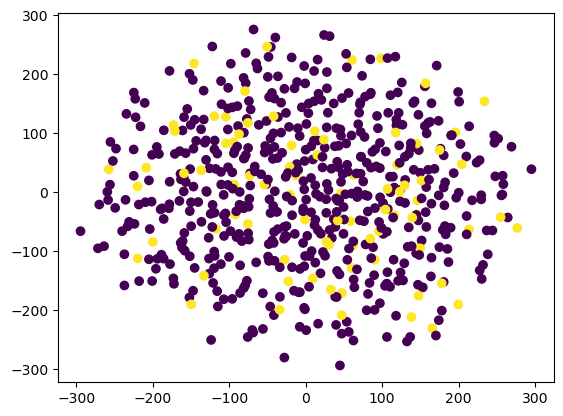

In [20]:
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels)
plt.show()

# Part 3: Performing a Cluster Analysis with K-means

In [21]:
# Identifying the best number of clusters using the elbow curve
inertias = []
k = range(1, 11)

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(myopia_pca)
    inertia = km.inertia_
    inertias.append(inertia)

C:\Users\patri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [22]:
inertias

[7948.9053453622255,
 6794.293482424857,
 6030.953811555917,
 5662.799044727999,
 5381.970825076563,
 5127.751086460432,
 4926.212041782274,
 4741.864183961289,
 4585.604308608676,
 4458.8466283267735]

In [23]:
elbow_data = pd.DataFrame({"k": list(k), "inertia": inertias})
elbow_data

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825
5,6,5127.751086
6,7,4926.212042
7,8,4741.864184
8,9,4585.604309
9,10,4458.846628


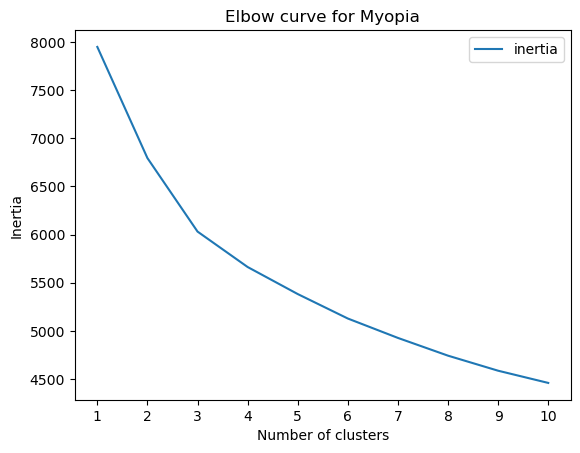

In [24]:
#  determining where the elbow of the plot is, and at which value of k it appears
elbow_data.plot(x="k", y="inertia")
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

The elbow appears at k =3

In [25]:
# Transforming PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3", 
                              "principal component 4", "principal component 5", "principal component 6", 
                              "principal component 7", "principal component 8", "principal component 9", 
                              "principal component 10", ]
)
#df_myopia_pca['class']= km.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [26]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fitting the model
model.fit(df_myopia_pca)

# Predicting clusters
predictions = model.predict(df_myopia_pca)

# Adding the predicted class column to the dataframe
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


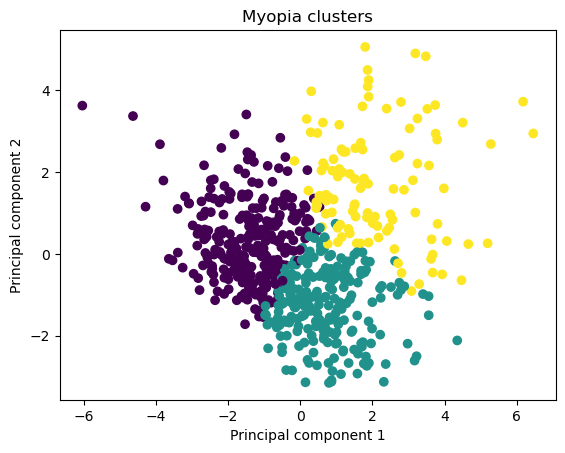

In [27]:
# Visualising the clusters
plt.scatter(x=df_myopia_pca['principal component 1'], y=df_myopia_pca['principal component 2'], c=df_myopia_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

# Part 4: Making a recommendation

**Myopia cluster findings:**

- The optimal number of clusters is 3
- t-SNE was not helpful in finding distinct clusters
- The Cluster Analysis with K-means performed better, although the clusters were not clearly distinct, so a bigger dataset is recommended as well as splitting the data into test and training to test the models.